In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit, cross_val_score
dict_brand = {'Adidas': 1, 'Nike': 2, 'New Balance': 3, 'Puma':4, 'Reebok':5, 'Under Armour': 6}
dict_cate = {'Jacket': 1, 'Shoes': 2, 'Jeans': 3, 'Dress':4, 'Sweater':5, 'T-shirt': 6}
dict_color = {'Black': 1, 'Blue': 2, 'Green': 3, 'Red':4, 'White':5, 'Yellow': 6}
dict_m = {'Cotton': 1, 'Wool': 2, 'Silk': 3, 'Red':4, 'Polyester':5, 'Nylon': 6}

In [2]:
# Reading in the dataset
df = pd.read_csv("clothes_price_prediction_data.csv")
cols = df.columns.tolist()
df = df.drop(['Size'], axis=1)
df

,Brand,Category,Color,Material,Price
0,New Balance,Dress,White,Nylon,182
1,New Balance,Jeans,Black,Silk,57
2,Under Armour,Dress,Red,Wool,127
3,Nike,Shoes,Green,Cotton,77
4,Adidas,Sweater,White,Nylon,113
...,...,...,...,...,...
995,Puma,Jeans,Black,Polyester,176
996,Puma,Jacket,Red,Silk,110
997,Reebok,Sweater,Blue,Denim,127
998,Under Armour,Sweater,Black,Denim,69


In [3]:
print(df.isna().sum())

Brand       0
Category    0
Color       0
Material    0
Price       0
dtype: int64


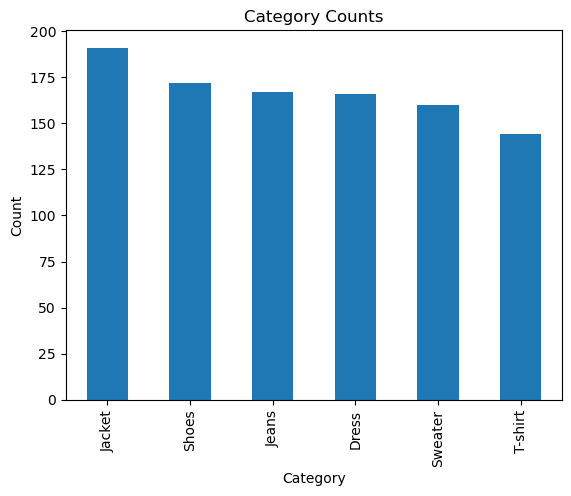

In [4]:
# Assuming 'df' is your DataFrame
category_counts = df['Category'].value_counts()

# Plotting the bar plot
category_counts.plot(kind='bar', title='Category Counts', xlabel='Category', ylabel='Count')
plt.show()

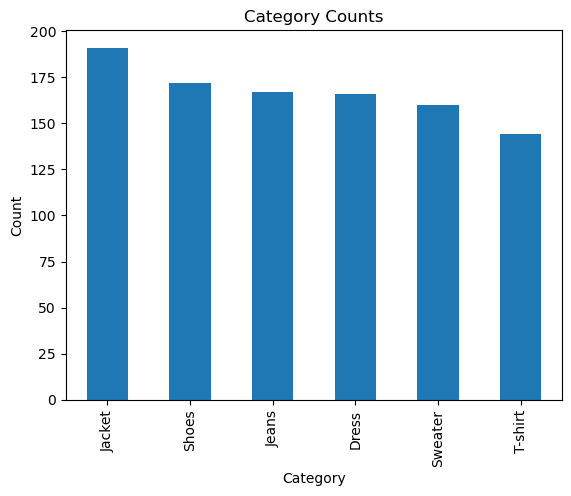

Jacket     191
Shoes      172
Jeans      167
Dress      166
Sweater    160
T-shirt    144
Name: Category, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
category_counts = df['Category'].value_counts()

# Plotting the bar plot
category_counts.plot(kind='bar', title='Category Counts', xlabel='Category', ylabel='Count')
plt.show()

# Displaying the counts in the console
print(df["Category"].value_counts())


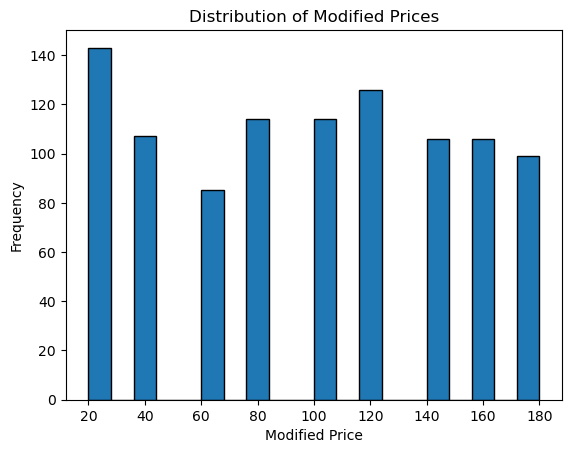

In [6]:
original = df["Price"]
changed = original.copy()

org_b = df['Brand']
org_cat = df['Category']
org_color = df['Color']
org_m = df['Material']
encode_cat = original.copy()
encode_b = original.copy()
encode_color = original.copy()
encode_m = original.copy()

for index in org_cat.index:
    encode_cat[index] = dict_cate.get(org_cat[index])
    encode_b[index] = dict_brand.get(org_b[index])
    encode_color[index] = dict_color.get(org_color[index])
    encode_m[index] = dict_m.get(org_m[index])

df['Category'] = encode_cat
df['Brand'] = encode_b
df['Color'] = encode_color
df['Material'] = encode_b

# Iterate over the index of the DataFrame
for index in changed.index:
    if changed[index] > 20:
        if changed[index] % 20 != 0:
            changed[index] = changed[index] - (changed[index] % 20)
    else:
        changed[index] = 20

df['Price'] = changed
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Plotting the histogram
plt.hist(df['Price'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Distribution of Modified Prices')
plt.xlabel('Modified Price')
plt.ylabel('Frequency')
plt.show()



In [7]:
# category_counts = df[''].value_counts()

# # Plotting the bar plot
# category_counts.plot(kind='bar', title='Category Counts', xlabel='Category', ylabel='Count')
# plt.show()

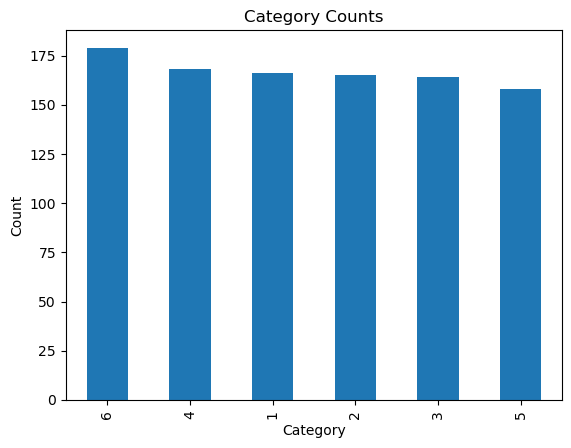

In [8]:
category_counts = df['Material'].value_counts()

# Plotting the bar plot
category_counts.plot(kind='bar', title='Category Counts', xlabel='Category', ylabel='Count')
plt.show()

In [9]:
scaler = StandardScaler()
pca = PCA()
labels = df['Price']
raw_df = df.drop('Price', axis = 1)

In [10]:
features = df.drop('Price', axis=1)
nb_clf = GaussianNB()
n_splits = 5
test_size = 0.1
splits = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
nb_nested_score = cross_val_score(nb_clf, features, labels, cv=n_splits)
average_accuracy = nb_nested_score.mean() * 100
print("Average Accuracy:", average_accuracy) 

Average Accuracy: 11.5


In [11]:
@ignore_warnings(category=ConvergenceWarning)
def run_nn():
    print('**Neural Network results**')
    nn_clf = MLPClassifier()
    # define the pipeline steps
    pipeline_nn = Pipeline([('scaler', scaler), ('nn_clf', nn_clf)])
    # define the hyperparameters
    param_grid_nn = {
        'nn_clf__hidden_layer_sizes':  [20, 30, 40, 50, 60],
        'nn_clf__activation': ['identity','logistic', 'tanh', 'relu'],
        'nn_clf__solver': ['lbfgs', 'sgd', 'adam']
    }
    
    # solver{‘lbfgs’, ‘sgd’, ‘adam’}
    # learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}
    
    nn_grid_search = GridSearchCV(pipeline_nn, param_grid_nn, cv=5, scoring='accuracy')
    nn_scores = cross_val_score(nn_grid_search, features, labels, cv=n_splits)
    print('Neural Net Accuracy:', nn_scores.mean()*100)

    return nn_scores.mean() * 100
#run_nn()

In [12]:
# # your code goes here
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report

# svc = SVC()
# # define pipeline steps
# pipeline2 = Pipeline([('scaler', scaler), ('svc', svc)])
# # define the hyperparameters
# param_grid2 = {
#     'svc__C':  [0.1, 1, 10, 100],
#     'svc__kernel': ['linear', 'rbf', 'poly']
# }
# svm_grid_search = GridSearchCV(pipeline2, param_grid2, cv=5, scoring='accuracy')
# preds_svm = cross_val_predict(svm_grid_search, features, labels, cv=5)
# print('Accuracy on test data is:', (accuracy_score(labels, preds_svm)))

In [13]:
import pickle
#replace this final_model with your final model
filename = 'finalized_model.sav'
#final_model = svm_grid_search.fit(features, labels)
final_model = nb_clf.fit(features.values, labels.values)
pickle.dump(final_model, open(filename, 'wb'))

In [14]:
# use this as the new record to classify
record = [2, 4, 5, 6]

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# your code goes here
predict = loaded_model.predict([record])
print(predict)

[120]
